In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
train_dir = 'D:\\python code data process\\cat vs dog\\archive\\training_set\\training_set'
validation_dir = 'D:\\python code data process\\cat vs dog\\archive\\test_set\\test_set'

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Number of batches per epoch
    epochs=30,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=50)  # Number of batches for validation


Epoch 1/30
100/100 [==============================] - 40s 396ms/step - loss: 0.3331 - accuracy: 0.8585 - val_loss: 0.3810 - val_accuracy: 0.8394
Epoch 2/30
100/100 [==============================] - 40s 401ms/step - loss: 0.3435 - accuracy: 0.8500 - val_loss: 0.3834 - val_accuracy: 0.8394
Epoch 3/30
100/100 [==============================] - 41s 406ms/step - loss: 0.3192 - accuracy: 0.8625 - val_loss: 0.3803 - val_accuracy: 0.8350
Epoch 4/30
100/100 [==============================] - 40s 396ms/step - loss: 0.3244 - accuracy: 0.8550 - val_loss: 0.3941 - val_accuracy: 0.8306
Epoch 5/30
100/100 [==============================] - 40s 402ms/step - loss: 0.3152 - accuracy: 0.8610 - val_loss: 0.3844 - val_accuracy: 0.8419
Epoch 6/30
100/100 [==============================] - 41s 405ms/step - loss: 0.3169 - accuracy: 0.8637 - val_loss: 0.3688 - val_accuracy: 0.8450
Epoch 7/30
100/100 [==============================] - 40s 401ms/step - loss: 0.3006 - accuracy: 0.8712 - val_loss: 0.3521 - val_ac

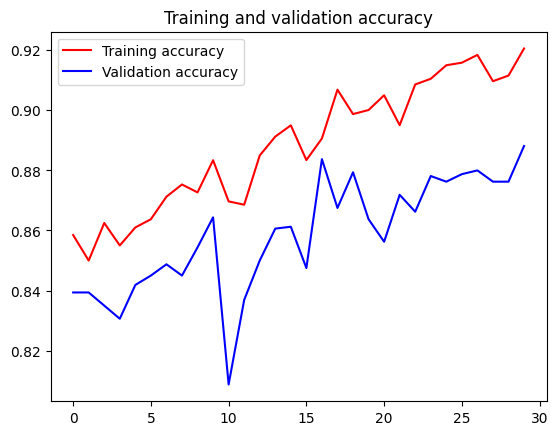

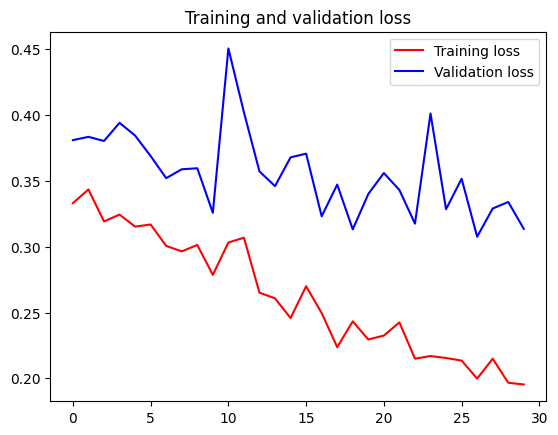

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [8]:
model.save('cats_and_dogs_classifier.h5')

C:\Users\shrirang sonawane\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
pip install tensorflow pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('cats_and_dogs_classifier.h5')

# Initialize the main window
root = tk.Tk()
root.title("Cat and Dog Classifier")
root.geometry("500x600")

# Function to load and preprocess the image
def load_image():
    global img, img_display
    file_path = filedialog.askopenfilename()
    if file_path:
        # Load the image with PIL
        img = Image.open(file_path)
        img = img.resize((150, 150))  # Resize to match model's expected input
        img_array = np.array(img) / 255.0  # Normalize the image

        # Display the image in the GUI
        img_display = ImageTk.PhotoImage(img)
        panel.configure(image=img_display)
        panel.image = img_display

        # Predict the class
        prediction = predict_image(img_array)
        result_label.config(text=prediction)

# Function to predict the image class
def predict_image(image_array):
    # Expand dimensions to match the model's input shape
    image_array = np.expand_dims(image_array, axis=0)
    # Make prediction
    prediction = model.predict(image_array)
    # Interpret the prediction
    if prediction[0] > 0.5:
        return "It's a Dog!"
    else:
        return "It's a Cat!"

# GUI Components
btn = tk.Button(root, text="Load Image", command=load_image)
btn.pack(pady=20)

panel = tk.Label(root)  # Label to display the image
panel.pack()

result_label = tk.Label(root, text="", font=("Helvetica", 16))
result_label.pack(pady=20)

# Start the GUI event loop
root.mainloop()
